# <p style="text-align:center;color:#254E58"><b> LAB 02 - NETFLIX </b></p>

---

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Thông tin thành viên</b></div>

- 21127115 - Trần Thanh Ngân
- 21127229 - Dương Trường Bình
- 21127616 - Lê Phước Quang Huy

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Mục lục</b></div>

<div class="list-group" id="list-tab" role="tablist">

   * [Đọc dữ liệu](#1)
        
   * [A. Mô tả dữ liệu](#A)

   * [B. Chuẩn bị & Tiền xử lý dữ liệu](#B)
   
   * [C. Khám phá & Phân tích dữ liệu](#C)
        - [Câu hỏi 1](#C.1)
        - [Câu hỏi 2](#C.2)
        - [Câu hỏi 3](#C.3)
        - [Câu hỏi 4](#C.4)
        - [Câu hỏi 5](#C.5)
        - [Câu hỏi 6](#C.6)

   * [D. Interactive Data Visualization](#D)
   
   * [C. Insights](#D)
        


# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Các thư viện sử dụng</b></div>

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from ipywidgets import widgets, interactive
from IPython.display import display

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Đọc dữ liệu</b></div>

## <span style='color:#074173'> <b> 👉 Netflix Dataset Movie </b> </span>

In [40]:
movie_df = pd.read_csv("../data/Netflix_Dataset_Movie.csv")
movie_df

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002,Where the Wild Things Are and Other Maurice Sendak Stories
17766,17767,2004,Fidel Castro: American Experience
17767,17768,2000,Epoch
17768,17769,2003,The Company


In [41]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_ID  17770 non-null  int64 
 1   Year      17770 non-null  int64 
 2   Name      17770 non-null  object
dtypes: int64(2), object(1)
memory usage: 416.6+ KB


In [42]:
movie_df.describe().round(1)

,Movie_ID,Year
count,17770.0,17770.0
mean,8885.5,1990.2
std,5129.9,16.6
min,1.0,1915.0
25%,4443.2,1985.0
50%,8885.5,1997.0
75%,13327.8,2002.0
max,17770.0,2005.0


In [43]:
# Missing rate
movie_df.isnull().sum()

Movie_ID    0
Year        0
Name        0
dtype: int64

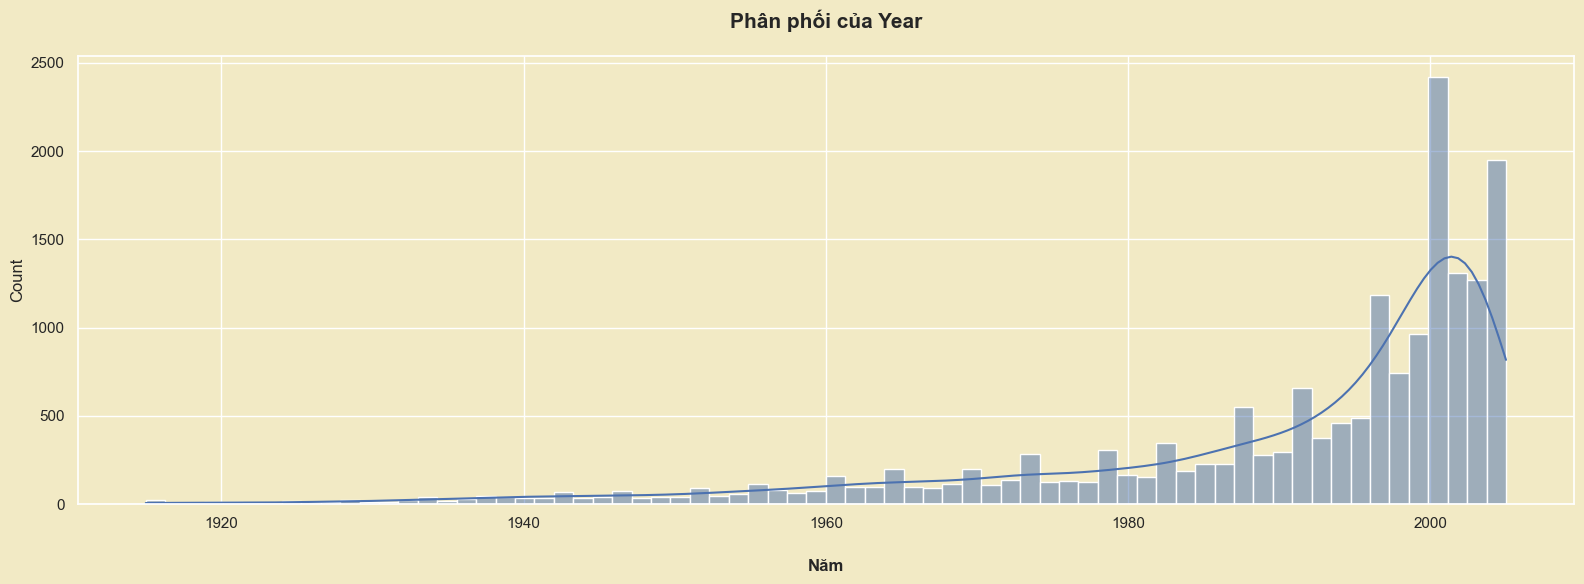

In [44]:
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
plt.figure(figsize=(16, 6))
sns.histplot(movie_df['Year'], kde=True)
plt.title('Phân phối của Year', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Năm', fontsize=12, fontweight='bold', labelpad=20)
plt.tight_layout()
plt.show()

## <span style='color:#074173'> <b> 👉 Netflix Dataset Rating </b> </span>

In [45]:
rating_df = pd.read_csv("../data/Netflix_Dataset_Rating.csv")
rating_df

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3
...,...,...,...
17337453,520675,3,4496
17337454,1055714,5,4496
17337455,2643029,4,4496
17337456,1559566,3,4496


In [46]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337458 entries, 0 to 17337457
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   User_ID   int64
 1   Rating    int64
 2   Movie_ID  int64
dtypes: int64(3)
memory usage: 396.8 MB


In [47]:
# Missing rate
rating_df.isnull().sum()

User_ID     0
Rating      0
Movie_ID    0
dtype: int64

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>A. Mô tả dữ liệu</b></div>

Netflix là dịch vụ giải trí trực tuyến hàng đầu thế giới với hơn 208 triệu lượt người sử dụng trên toàn cầu tại hơn 130 quốc gia, bao gồm đa dạng các loại chương trình truyền hình, phim dài tập, phim tài liệu và phim truyện thuộc nhiều thể loại và ngôn ngữ.

[Netflix Movie Rating Dataset](https://www.kaggle.com/datasets/rishitjavia/netflix-movie-rating-dataset) bao gồm 2 tập dữ liệu là `Netflix_Dataset_Movie` và `Netflix_Dataset_Rating`.

## <span style='color:#074173'> <b> 👉 Netflix Dataset Movie </b> </span>

Tập dữ liệu `Netflix_Dataset_Movie.csv` chứa 17,770 dòng và 3 cột, mỗi dòng tương ứng cho một bộ phim theo định dạng sau:

<center><span style='color:#FFAF45'><b> Movie_ID,Year,Name </b></span></center> <br>  

|STT | Tên thuộc tính | Mô tả | Giá trị | Kiểu dữ liệu |
|:---| :---           |:---   |:---     |:---          |
| 1  | Movie_ID | Mã bộ phim | Nằm trong khoảng từ 1 đến 17,770 | Integer |
| 2  | Year  | Năm mà bộ phim ra mắt | Từ năm 1915 đến năm 2005 | Integer |
| 3  | Name | Tên đầy đủ của bộ phim | | String |

## <span style='color:#074173'> <b>👉 Netflix Dataset Rating </b> </span>

Tập dữ liệu `Netflix_Dataset_Rating.csv` chứa 17,337,458 dòng và 3 cột, mỗi dòng tương ứng cho một đánh giá từ người dùng theo định dạng sau:

<center><span style='color:#FFAF45'><b> User_ID,Rating,Movie_ID </b></span></center> <br>  

|STT | Tên thuộc tính | Mô tả | Giá trị | Kiểu dữ liệu |
|:---| :---           |:---   |:---     |:---          |
| 1  | User_ID | Mã định danh người dùng | Nằm trong phạm vi từ 1 đến 2,649,429, với những khoảng trống giữa chúng. Có tổng cộng 480,189 người dùng | Integer |
| 2  | Rating  | Đánh giá | Trên thang đo 5 sao, tương ứng từ 1 đến 5 | Integer |
| 3  | Movie_ID | Mã bộ phim | Nằm trong khoảng từ 1 đến 17,770 | Integer |

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>B. Chuẩn bị & Tiền xử lý dữ liệu</b></div>

In [48]:
# Chuyển kiểu dữ liệu của Năm từ Integer sang Datetime
# movie_df['Year'] = pd.to_datetime(movie_df['Year']).dt.year
# movie_df.dtypes

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>C. Khám phá và Phân tích dữ liệu</b></div>

# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>❓ Câu hỏi 1: Phân tích xu hướng trong ngành công nghiệp điện ảnh qua các năm. Năm nào có số lượng phim được ra mắt nhiều nhất?</b></div>

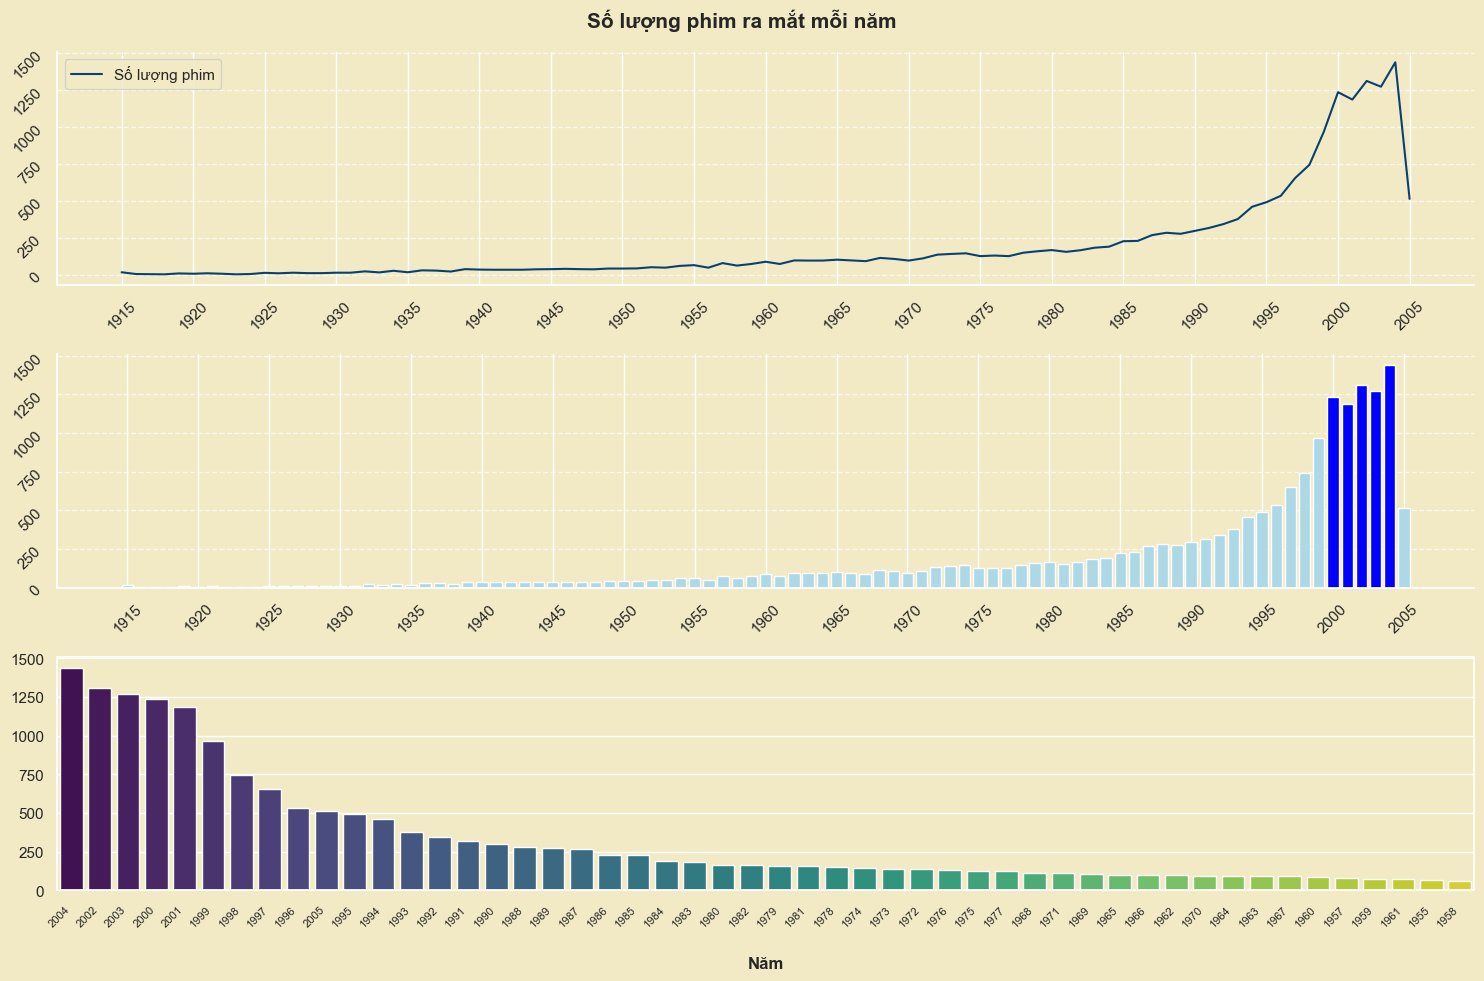

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 10))

year_count = movie_df.groupby('Year').count()
top_years = year_count['Movie_ID'].nlargest(5)

ax2.bar(year_count.index, year_count['Movie_ID'], color='lightblue')
ax2.bar(top_years.index, top_years, color='blue')
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.tick_params(rotation=45)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_xticks(np.arange(min(year_count.index), max(year_count.index) + 1, 5))

ax1.plot(year_count.index, year_count['Movie_ID'], color='#074173', label='Số lượng phim')
ax1.legend(loc='best')
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(rotation=45)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_xticks(np.arange(min(year_count.index), max(year_count.index) + 1, 5))

sns.set(style="whitegrid")
movie_count = movie_df.groupby('Year')['Movie_ID'].count().reset_index()
movie_count = movie_count.sort_values(by='Movie_ID', ascending=False).head(50)
ax3 = sns.countplot(x='Year', data=movie_df, palette="viridis", order=movie_count['Year'].head(50))
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right', fontsize=8)
ax3.set_xlabel('Năm', fontsize=12, fontweight='bold', labelpad=20)
ax3.set_ylabel(None)

plt.suptitle('Số lượng phim ra mắt mỗi năm', fontsize=15, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

#### <span style='color:#074173'> 💬 Nhận xét: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Trước hết, chúng ta có thể thấy số lượng phim ra mắt mỗi năm có xu hướng tăng dần. Điều này phản ánh sự phát triển của ngành công nghiệp điện ảnh, cũng như sự tăng trưởng của thị trường giải trí.
- Năm đạt đỉnh cao trong lịch sử sản xuất phim có thể kể đến là chuỗi 5 năm liên tiếp từ năm 2000 đến năm 2004, khi số lượng phim ra mắt vượt qua mốc 1000 bộ phim so với các năm trước, trong đó 2004 là năm có số lượng cao nhất - gần 1500 bộ phim. Điều này chỉ ra một thời kỳ sôi động và phát triển mạnh mẽ của ngành công nghiệp điện ảnh, có thể do sự đầu tư mạnh mẽ từ các công ty sản xuất, sự hấp dẫn của thị trường và nhu cầu giải trí của công chúng.

# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>❓ Câu hỏi 2: Những bộ phim nào có số lượt đánh giá cao nhất ?</b></div>

Top những bộ phim có số lượt đánh giá cao nhất:
    Movie_ID                                             Tên bộ phim  Số lượt đánh giá
0      1905  Pirates of the Caribbean: The Curse of the Black Pearl            117075
1      2452           Lord of the Rings: The Fellowship of the Ring            102721
2      4306                                         The Sixth Sense            102376
3       571                                         American Beauty            101450
4      3860                                          Bruce Almighty             98545
5      2862                                The Silence of the Lambs             95053
6      3962                               Finding Nemo (Widescreen)             94235
7      4432                                         The Italian Job             93886
8      3938                                                 Shrek 2             92893
9      2782                                              Braveheart             91502

Bộ p

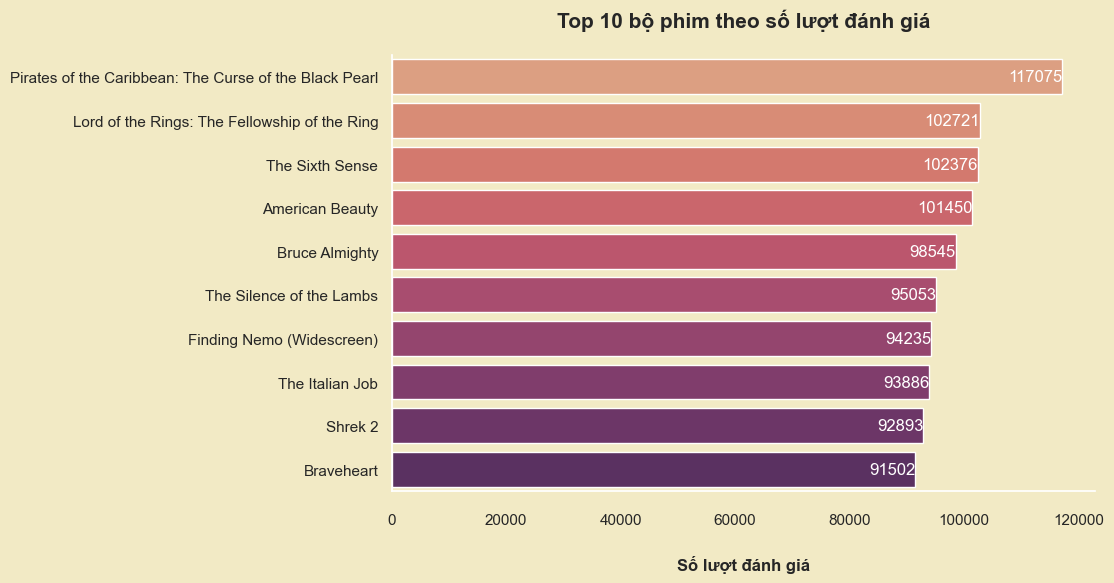

In [50]:
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})

plt.figure(figsize=(15, 6))

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

num_of_ratings = rating_df.groupby('Movie_ID')['Rating'].count().reset_index()
top_num_of_ratings = num_of_ratings.sort_values(by='Rating', ascending=False).head(10)
top_num_of_ratings = pd.merge(top_num_of_ratings, movie_df[['Movie_ID', 'Name']], on='Movie_ID')
top_num_of_ratings = top_num_of_ratings[['Movie_ID', 'Name', 'Rating']]
top_num_of_ratings = top_num_of_ratings.rename(columns={'Name': 'Tên bộ phim', 'Rating': 'Số lượt đánh giá'})
print("Top những bộ phim có số lượt đánh giá cao nhất:\n", top_num_of_ratings)

last_rank = num_of_ratings.sort_values(by='Rating', ascending=False).tail(1)
last_rank['Name'] = last_rank['Movie_ID'].map(movie_df.set_index('Movie_ID')['Name'])
last_rank = last_rank[['Movie_ID', 'Name', 'Rating']]
last_rank = last_rank.rename(columns={'Name': 'Tên bộ phim', 'Rating': 'Số lượt đánh giá'})
print("\nBộ phim có thứ hạng thấp nhất:\n", last_rank)

gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])
ax = plt.subplot(gs[0])

sns.barplot(y=top_num_of_ratings['Tên bộ phim'],
            x=top_num_of_ratings['Số lượt đánh giá'], data=top_num_of_ratings, palette="flare")

for i, rating in enumerate(top_num_of_ratings['Số lượt đánh giá']):
    ax.text(rating, i, str(rating), ha='right', va='center', color='white', fontsize=12)

ax.set_title('Top 10 bộ phim theo số lượt đánh giá', fontsize=15, fontweight='bold', pad=20)
ax.set_ylabel(None)
ax.set_xlabel('Số lượt đánh giá', fontsize=12, fontweight='bold', labelpad=20)
ax.tick_params(axis='x', which='major', pad=10)
ax.grid(False)
sns.despine()

plt.tight_layout()
plt.show()

#### <span style='color:#074173'> 💬 Nhận xét: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Phim `Pirates of the Caribbean: The Curse of the Black Pearl` thu hút sự quan tâm lớn nhất từ khán giả với tổng cộng `117,075` lượt đánh giá, cao hơn khoảng 1,14 lần so với bộ phim xếp thứ 2 là "Lord of the Rings: The Fellowship of the Ring" với 102,721 lượt đánh giá. 
- Từ hạng 3 đến hạng 10 lần lượt là:
    - 3. The Sixth Sense - **102376 lượt**
    - 4. American Beauty - **101450 lượt**
    - 5. Bruce Almighty - **98545 lượt**
    - 6. The Silence of the Lambs - **95053 lượt**
    - 7. Finding Nemo (Widescreen) - **94235 lượt**
    - 8. The Italian Job - **93886 lượt**
    - 9. Shrek 2 - **92893 lượt**
    - 10. Braveheart - **91502 lượt**
- Chênh lệch giữa bộ phim có thứ hạng đầu tiên là "Pirates of the Caribbean: The Curse of the Black Pearl" và bộ phim có thứ hạng cuối cùng là "Inu-Yasha" (1042 lượt đánh giá) là khá lớn, trong đó "Pirates of the Caribbean: The Curse of the Black Pearl" thu về số lượt đánh giá cao hơn, gấp 112 lần so với "Inu-Yasha".

# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>❓ Câu hỏi 3: Những bộ phim nào có đánh giá cao nhất ? (1-5 sao)</b></div>

Top các bộ phim có đánh giá cao nhất:
       Movie_ID                                    Tên bộ phim  Đánh giá (1-5 sao)
1038      3456                                 Lost: Season 1                 4.7
630       2102                         The Simpsons: Season 6                 4.6
1034      3444          Family Guy: Freakin' Sweet Collection                 4.5
452       1476                       Six Feet Under: Season 4                 4.5
1269      4238                                      Inu-Yasha                 4.5
781       2568                        Stargate SG-1: Season 8                 4.5
396       1256                    The Best of Friends: Vol. 4                 4.4
1329      4427                        The West Wing: Season 3                 4.4
746       2452  Lord of the Rings: The Fellowship of the Ring                 4.4
595       1947                        Gilmore Girls: Season 3                 4.4


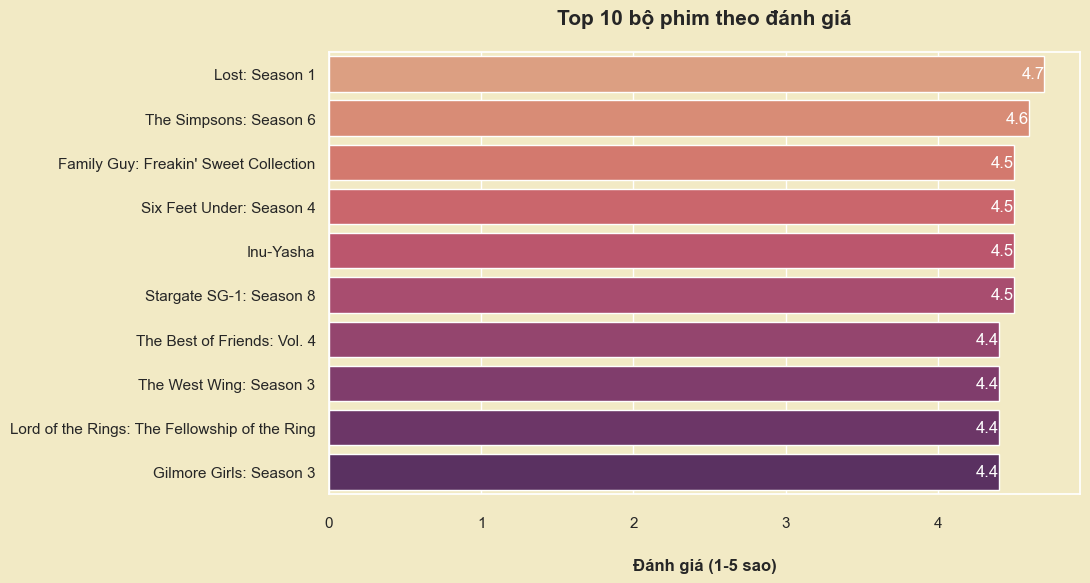

In [51]:
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
plt.figure(figsize=(15, 6))

top_ratings = rating_df.groupby('Movie_ID')['Rating'].mean().reset_index()
top_ratings = top_ratings.sort_values(by='Rating', ascending=False).head(10).round(1)
top_ratings['Name'] = top_ratings['Movie_ID'].map(movie_df.set_index('Movie_ID')['Name'])
top_ratings = top_ratings[['Movie_ID', 'Name', 'Rating']]
top_ratings = top_ratings.rename(columns={'Name': 'Tên bộ phim', 'Rating': 'Đánh giá (1-5 sao)'})
print("Top các bộ phim có đánh giá cao nhất:\n", top_ratings)

gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])
ax = plt.subplot(gs[0])

sns.barplot(y=top_ratings['Tên bộ phim'],
            x=top_ratings['Đánh giá (1-5 sao)'], data=top_ratings, palette="flare")

for i, rating in enumerate(top_ratings['Đánh giá (1-5 sao)']):
    ax.text(rating, i, str(rating), ha='right', va='center', color='white', fontsize=12)

ax.set_title('Top 10 bộ phim theo đánh giá', fontsize=15, fontweight='bold', pad=20)
ax.set_ylabel(None)
ax.set_xlabel('Đánh giá (1-5 sao)', fontsize=12, fontweight='bold', labelpad=20)
ax.tick_params(axis='x', which='major', pad=10)

plt.tight_layout()
plt.show()

#### <span style='color:#074173'> 💬 Nhận xét: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Bộ phim được đánh giá cao nhất là `Lost: Season 1` với điểm số lên đến `4.7 sao`. Hạng 2 thuộc về bộ phim "The Simpsons: Season 6" với 4.6 sao. 
- Từ hạng 3 đến hạng 10 lần lượt là:
    - 3. Family Guy: Freakin' Sweet Collection - **4.5 sao**
    - 4. Six Feet Under: Season 4 - **4.5 sao**
    - 5. Inu-Yasha - **4.5 sao**
    - 6. Stargate SG-1: Season 8 - **4.5 sao**
    - 7. The Best of Friends: Vol. 4 - **4.4 sao**
    - 8. The West Wing: Season 3 - **4.4 sao**
    - 9. Lord of the Rings: The Fellowship of the Ring - **4.4 sao**
    - 10. Gilmore Girls: Season 3 - **4.4 sao**
- Tuy nhiên, thứ hạng chỉ là một phần của bảng xếp hạng này. Mặc dù một số bộ phim có đánh giá cao, nhưng số lượng lượt đánh giá có thể không nhiều bằng những bộ phim khác. Do đó, cần phải xem xét cả hai yếu tố này để có cái nhìn toàn diện về sức hút của một bộ phim.

# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>❓ Câu hỏi 4: Dựa trên việc xem xét cả hai yếu tố về Đánh giá và Tổng số lượt đánh giá, bộ phim nào có đánh giá tốt nhất ?</b></div>

In [52]:
combined_rating = rating_df.groupby('Movie_ID')['Rating'].agg(['mean', 'count']).reset_index()
combined_rating['mean'] = combined_rating['mean'].round(1)
combined_rating = pd.merge(combined_rating, movie_df[['Movie_ID', 'Name']], on='Movie_ID')
combined_rating = combined_rating.nlargest(10, 'count')
combined_rating = combined_rating.rename(columns={'Name': 'Tên bộ phim', 'mean': 'Đánh giá (1-5 sao)', 'count': 'Số lượt đánh giá'})
combined_rating = combined_rating[['Movie_ID', 'Tên bộ phim', 'Đánh giá (1-5 sao)', 'Số lượt đánh giá']]
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
print(combined_rating)

fig = make_subplots(rows=1, cols=2, shared_yaxes=True, horizontal_spacing=0)

# Tạo biểu đồ cột ngang biểu thị "đánh giá" bên trái
fig.add_trace(
    go.Bar(x=-combined_rating['Đánh giá (1-5 sao)'], y=combined_rating['Movie_ID'].map(movie_df.set_index('Movie_ID')['Name']), 
           orientation='h', marker_color='#221f1f', name='Đánh giá (1-5 sao)', text=combined_rating['Đánh giá (1-5 sao)'], 
           hoverinfo='skip'), 
    row=1, col=1
)

# Tạo biểu đồ cột ngang biểu thị "số lượt đánh giá" bên phải
fig.add_trace(
    go.Bar(x=combined_rating['Số lượt đánh giá'], y=combined_rating['Movie_ID'].map(movie_df.set_index('Movie_ID')['Name']), 
           orientation='h', marker_color='#b20710', name='Số lượt đánh giá', text=combined_rating['Số lượt đánh giá'], 
           hoverinfo='skip'), 
    row=1, col=2
)

# Cập nhật axes
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)

# Cập nhật traces
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))

# Cập nhật layout
fig.update_layout(
    title='Những bộ phim có đánh giá tốt nhất trên cả hai yếu tố',
    margin=dict(t=80, b=0, l=70, r=40),
    hovermode="y unified", 
    xaxis_title=' ', yaxis_title=" ",
    plot_bgcolor='#F2EAC5', paper_bgcolor='#F2EAC5',
    title_font=dict(size=20, color='#000000', family="Lato, sans-serif"),
    font=dict(color='#000000'),
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
    hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif")
)
fig.show()

      Movie_ID                                             Tên bộ phim  Đánh giá (1-5 sao)  Số lượt đánh giá
587       1905  Pirates of the Caribbean: The Curse of the Black Pearl                 4.1            117075
746       2452           Lord of the Rings: The Fellowship of the Ring                 4.4            102721
1291      4306                                         The Sixth Sense                 4.3            102376
184        571                                         American Beauty                 3.9            101450
1162      3860                                          Bruce Almighty                 3.4             98545
857       2862                                The Silence of the Lambs                 4.3             95053
1199      3962                               Finding Nemo (Widescreen)                 4.4             94235
1331      4432                                         The Italian Job                 3.7             93886
1191      3938     

#### <span style='color:#074173'> 💬 Nhận xét: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Ta có thể thấy các bộ phim đã được xếp thứ hạng một cách tổng quát hơn dựa trên hai yếu tố là "đánh giá" và "số lượt đánh giá". 
- Theo đó, bộ phim có thứ hạng cao nhất theo thang đánh giá 1-5 sao thuộc về "Lord of the Rings: The Fellowship of the Ring" và "Finding Nemo (Widescreen)", với 4.4 sao và tương ứng với số lượt đánh giá lần lượt là 102,721 và 94,235 lượt.
- Tuy nhiên, nếu nhìn vào số lượng lượt đánh giá thì bộ phim "Pirates of the Caribbean: The Curse of the Black Pearl" lại chiếm vị trí hàng đầu với 117,075 lượt và đạt điểm số trung bình 4.1 sao. Điều này cho thấy sức hút lớn của bộ phim này đối với khán giả, dù điểm số trung bình có thể không cao bằng một số bộ phim khác.

# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>❓ Câu hỏi 5: Những từ nào xuất hiện nhiều nhất trong tên của các bộ phim ?</b></div>

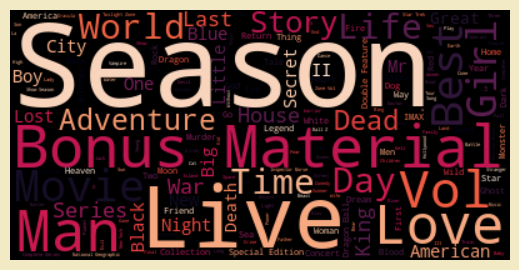

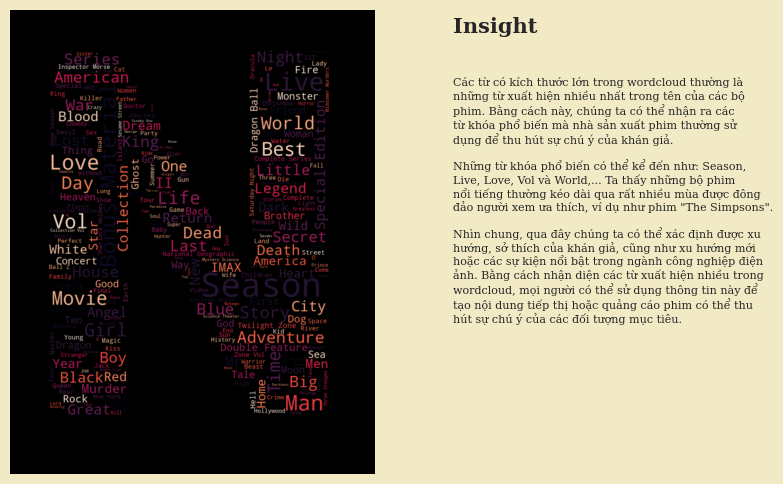

In [53]:
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})

text = ''
stopwords = set(STOPWORDS)

for words in movie_df['Name']:
    words = str(words)
    split_word = words.split(" ")
    text += ' '.join(split_word) + ' '

wordcloud = WordCloud(stopwords = stopwords, colormap = 'rocket_r').generate(text)

plt.figure(figsize = (5, 5), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

mask = np.array(Image.open('mask.png'))
wordcloud_mask = WordCloud(stopwords=stopwords, background_color='black', width=500, height=200, colormap='rocket_r', 
                      mask=mask, max_words=250).generate(text)

fig, ax = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [2, 1]}) 
ax[0].imshow(wordcloud_mask, interpolation="bilinear") 
ax[0].axis("off")

ax[1].text(0.05, 0.95, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif', ha='left') 
ax[1].text(0.05, 0.3, '''
Các từ có kích thước lớn trong wordcloud thường là 
những từ xuất hiện nhiều nhất trong tên của các bộ 
phim. Bằng cách này, chúng ta có thể nhận ra các 
từ khóa phổ biến mà nhà sản xuất phim thường sử 
dụng để thu hút sự chú ý của khán giả.

Những từ khóa phổ biến có thể kể đến như: Season, 
Live, Love, Vol và World,... Ta thấy những bộ phim 
nổi tiếng thường kéo dài qua rất nhiều mùa được đông 
đảo người xem ưa thích, ví dụ như phim "The Simpsons".

Nhìn chung, qua đây chúng ta có thể xác định được xu
hướng, sở thích của khán giả, cũng như xu hướng mới 
hoặc các sự kiện nổi bật trong ngành công nghiệp điện 
ảnh. Bằng cách nhận diện các từ xuất hiện nhiều trong 
wordcloud, mọi người có thể sử dụng thông tin này để 
tạo nội dung tiếp thị hoặc quảng cáo phim có thể thu 
hút sự chú ý của các đối tượng mục tiêu.
'''
         , fontsize=8, fontweight='normal', fontfamily='serif', ha='left')

ax[1].axis("off")
plt.tight_layout()
plt.show()

# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>❓ Câu hỏi 6: Mỗi khoảng đánh giá (1-5 sao) lần lượt chiếm tỷ trọng bao nhiêu trong toàn bộ kết quả đánh giá từ người xem ?</b></div>

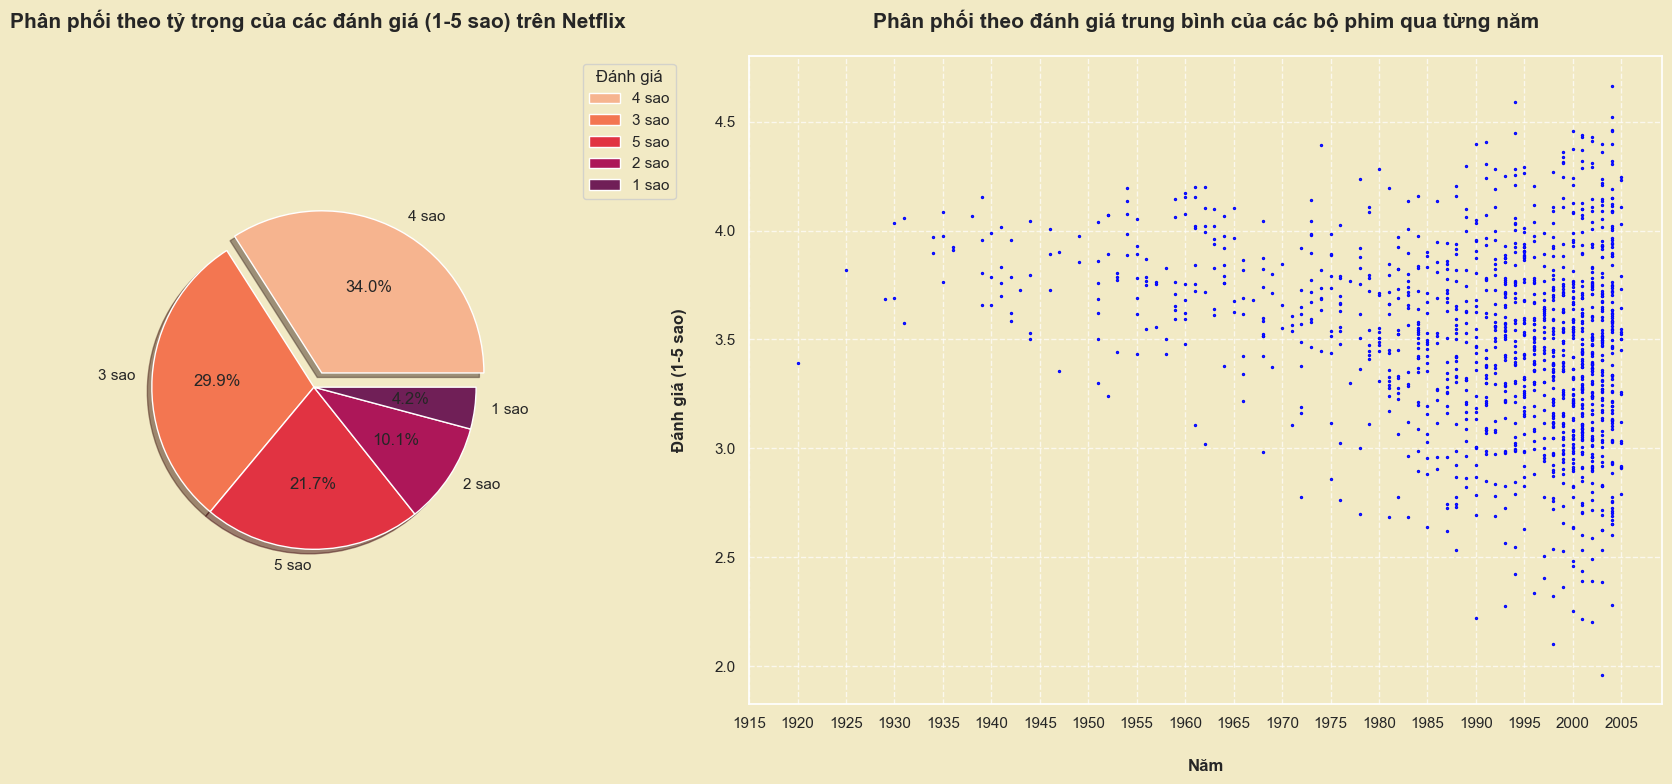

In [54]:
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 2.5]})

ratings = {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0}
rating_counts = rating_df['Rating'].value_counts(normalize=True) * 100

ax1.pie(rating_counts, labels=[f"{rating} sao" for rating in rating_counts.index], autopct='%1.1f%%', startangle=0,
        explode=[0.1, 0, 0, 0, 0], shadow=True,
        colors=sns.color_palette("rocket_r"))
ax1.axis('equal')
ax1.set_title('Phân phối theo tỷ trọng của các đánh giá (1-5 sao) trên Netflix', fontdict={"fontsize":15}, fontweight='bold', pad=20)
ax1.legend(title="Đánh giá", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

for movie_id in rating_df['Movie_ID'].unique():
    movie_info = movie_df[movie_df['Movie_ID'] == movie_id]
    average_rating = rating_df[rating_df['Movie_ID'] == movie_id]['Rating'].mean()
    ax2 = sns.scatterplot(x=movie_info['Year'], y=average_rating, color='skyblue', s=2, edgecolor='blue', linewidth=1.0)

ax2.set_title('Phân phối theo đánh giá trung bình của các bộ phim qua từng năm', fontsize=15, fontweight='bold', pad=20)
ax2.set_xlabel('Năm', labelpad=20, fontsize=12, fontweight='bold')
ax2.set_ylabel('Đánh giá (1-5 sao)', labelpad=20, fontsize=12, fontweight='bold')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_xticks(np.arange(min(movie_df['Year']), max(movie_df['Year']) + 1, 5))

plt.tight_layout()
plt.show()

#### <span style='color:#074173'> 💬 Nhận xét: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Phần lớn người xem (chiếm 34.0%) đánh giá các bộ phim với mức 4 sao, cho thấy mức độ hài lòng lớn với chất lượng và trải nghiệm xem phim.
- Trong khi đó các bộ phim được đánh giá với mức 5 - mức cao nhất, chỉ chiếm 21.7%, có thể do người xem đặt tiêu chuẩn cao hơn cho mức đánh giá cao nhất này.
- Số lượng phim được đánh giá với mức trung bình là 3 sao cũng khá phổ biến, chiếm 29.9% trên tổng số, cho thấy một phần đáng kể của người xem có ý kiến trung bình về các bộ phim này.
- Cuối cùng là các đánh giá thấp hơn - 2 sao và 1 sao - lần lượt là 10,1% và 4.2%. Tuy chỉ chiếm tỷ trọng nhỏ, nhưng qua đó cũng có thể thấy một số ít người xem không hài lòng hoặc có nhận định tiêu cực về một số bộ phim.
- Khi quan sát kĩ hơn qua từng năm *(biểu đồ bên phải)*, ta nhận thấy một tăng trưởng đáng kể trong số lượt đánh giá từ người xem trong những năm gần đây, đặc biệt là từ năm 1980 trở đi. Trước đó, đa số là những lượt đánh giá từ 3 sao đến 4.3 sao. Trong khi đó, trong những năm gần đây, phân bố này trải rộng hơn, từ các đánh giá thấp nhất là 2 sao đến những đánh giá cao nhất là hơn 4.5 sao.

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>D. Interactive Data Visualization</b></div>

In [55]:
avg_ratings = rating_df.groupby('Movie_ID')['Rating'].mean().reset_index()
avg_ratings = pd.merge(avg_ratings, movie_df[['Movie_ID', 'Year', 'Name']], on='Movie_ID', how='left')

def get_color_scale(num_movies, ratings):
    color_scale = []
    for rating in ratings:
        if rating >= 4.5: color_scale.append('#451952')  
        elif rating >= 4.0: color_scale.append('#6A0DAD')  
        elif rating >= 3.5: color_scale.append('#C21292') 
        elif rating >= 3.0: color_scale.append('#BF3131') 
        elif rating >= 2.5: color_scale.append('#EC8F5E') 
        elif rating >= 2.0: color_scale.append('#FFAD84') 
        else: color_scale.append('#F5CCA0')  
    return color_scale

fig = go.FigureWidget()

def update_plot(selected_year, num_movies):
    filtered_ratings = avg_ratings[avg_ratings['Year'] == selected_year]
    highest_rated_movie = filtered_ratings.nlargest(num_movies, 'Rating')
    # colors = get_colors_from_cmap(num_movies)
    
    fig.data = []
    
    fig.add_trace(go.Bar(y=highest_rated_movie['Name'],
                         x=highest_rated_movie['Rating'],
                         marker_color=get_color_scale(num_movies, highest_rated_movie['Rating']), 
                         opacity=0.9, 
                         orientation='h'))

    fig.update_layout(title=f'Top 10 bộ phim có rating cao nhất trong năm {selected_year}',
                      xaxis_title='Rating',
                      yaxis_title=None,
                      plot_bgcolor='rgba(0, 0, 0, 0)', 
                      paper_bgcolor='rgba(0, 0, 0, 0)',
                      font=dict(color='black', size=11, family="Arial, sans-serif"),  
                      title_font=dict(size=15, family="Arial, sans-serif"), 
                      title_pad=dict(b=20),
                      barmode='group',
                      margin=dict(l=150, r=20, t=50, b=70),
                      annotations=[dict(x=rating, y=name, text=str(round(rating, 2)),
                      font=dict(color='black', size=11), 
                      showarrow=False, xshift=20) for rating, name in zip(highest_rated_movie['Rating'], highest_rated_movie['Name'])],
                      width=800,
                      height=22 * num_movies * 1.5
                      )
    
year_dropdown = widgets.Dropdown(
    options=sorted(avg_ratings['Year'].unique()),
    value=2000,  
    description='Năm:',
    disabled=False,
)

num_movies_dropdown = widgets.Dropdown(
    options=[10, 20, 30, 40, 50],
    value=10,  
    description='Số bộ phim:',
    disabled=False,
)

interactive_plot = interactive(update_plot, selected_year=year_dropdown, num_movies=num_movies_dropdown)

display(interactive_plot, fig)

interactive(children=(Dropdown(description='Năm:', index=67, options=(1920, 1925, 1929, 1930, 1931, 1934, 1935…

FigureWidget({
    'data': [{'marker': {'color': [#6A0DAD, #6A0DAD, #6A0DAD, #6A0DAD, #6A0DAD,
                                   #6A0DAD, #6A0DAD, #C21292, #C21292, #C21292]},
              'opacity': 0.9,
              'orientation': 'h',
              'type': 'bar',
              'uid': 'afac617a-79d9-4600-9a51-674d509d9ecb',
              'x': array([4.45777351, 4.37588707, 4.24243365, 4.21016692, 4.12721114, 4.0828373 ,
                          4.07855626, 3.9903525 , 3.95839753, 3.94516908]),
              'y': array(['Inu-Yasha', 'CSI: Season 1', 'Gilmore Girls: Season 1',
                          'Farscape: Season 2', 'Aqua Teen Hunger Force: Vol. 1',
                          'Roswell: Season 2', 'SpongeBob SquarePants: Season 2',
                          'Monty Python: The Life of Python', 'Coupling: Season 1',
                          'Saturday Night Live: The Best of Eddie Murphy'], dtype=object)}],
    'layout': {'annotations': [{'font': {'color': 'black', 'size': 11},

In [56]:
movie_by_year = movie_df.groupby("Year")['Movie_ID'].count().reset_index().rename(columns = {'Movie_ID' : 'count'})
movie_by_year['change'] = movie_by_year['count'].diff().fillna(0)
movie_by_year = movie_by_year.sort_values("Year")

fig = go.Figure(go.Waterfall(
    orientation = "v",
    x = movie_by_year['Year'],
    textposition = "auto",
    text = movie_by_year["change"].astype(str),
    y = movie_by_year["change"],
    connector = {"line":{"color":"#b20710"}},
    increasing = {"marker":{"color":"#b20710"}},
    decreasing = {"marker":{"color":"orange"}},
))

fig.update_xaxes(showgrid=False, tickvals=movie_by_year['Year'][::5], ticktext=movie_by_year['Year'][::5])
fig.update_yaxes(showgrid=False, visible=False)
fig.update_traces(hovertemplate=None)
fig.update_layout(title='Number of movies over the year', height=350,
                   margin=dict(t=80, b=20, l=50, r=50),
                   hovermode="x unified",
                   xaxis_title=' ', yaxis_title=" ",
                   plot_bgcolor='#F2EAC5', paper_bgcolor='#F2EAC5',
                   title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                   font=dict(color='#8a8d93'))

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>E. Insights</b></div>